In [48]:
%matplotlib notebook

In [49]:
# Dependencies
import openweathermapy.core as owm
# Dependencies
import requests
import random
#from config import api_key
from config import gkey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [3]:
#tripdata_file = "RideShare_Data_201801.csv"

#src_df = pd.read_csv(tripdata_file)

#src_df

In [50]:
Jan = pd.read_csv("RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Feb = pd.read_csv("RideShare_Data_201802.csv", parse_dates=[0], low_memory=False)
Mar = pd.read_csv("RideShare_Data_201803.csv", parse_dates=[0], low_memory=False)
Apr = pd.read_csv("RideShare_Data_201804.csv", parse_dates=[0], low_memory=False)
May = pd.read_csv("RideShare_Data_201805.csv", parse_dates=[0], low_memory=False)
Jun = pd.read_csv("RideShare_Data_201806.csv", parse_dates=[0], low_memory=False)
Jul = pd.read_csv("RideShare_Data_201807.csv", parse_dates=[0], low_memory=False)
Aug = pd.read_csv("RideShare_Data_201808.csv", parse_dates=[0], low_memory=False)
Sep = pd.read_csv("RideShare_Data_201809.csv", parse_dates=[0], low_memory=False)
Oct = pd.read_csv("RideShare_Data_201810.csv", parse_dates=[0], low_memory=False)
Nov = pd.read_csv("RideShare_Data_201811.csv", parse_dates=[0], low_memory=False)
Dec = pd.read_csv("RideShare_Data_201812.csv", parse_dates=[0], low_memory=False)
src_df = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])


In [51]:
src_df["week_day"] =pd.to_datetime(src_df["Pickup_DateTime"]).dt.dayofweek

src_df.head()
src_df["week_day"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [52]:
def fdayofweek(x):
    return {
        0:'Monday',
        1:'Tuesday',
        2:'Wednesday',
        3:'Thrusday',
        4:'Friday',
        5:'Saturday',
        6:'Sunday',
     }.get(x, "NA")



src_df["week_day_name"]= src_df["week_day"].apply(fdayofweek)
src_df["week_day_name"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [53]:
src_df["date"] =pd.to_datetime(src_df["Pickup_DateTime"]).dt.day
src_df["date"]

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
84970    31
84971    31
84972    31
84973    31
84974    31
84975    31
84976    31
84977    31
84978    31
84979    31
84980    31
84981    31
84982    31
84983    31
84984    31
84985    31
84986    31
84987    31
84988    31
84989    31
84990    31
84991    31
84992    31
84993    31
84994    31
84995    31
84996    31
84997    31
84998    31
84999    31
Name: date, Length: 1020000, dtype: int64

In [90]:
src_df["hours"] =pd.to_datetime(src_df["Pickup_DateTime"]).dt.hour
src_df["hours"]

# Create bins in which to place values based upon TED Talk views
bins = [-1, 5, 11, 17, 23]
       

# Create labels for these bins
#group_labels = ["Morning", "afternoon", "evening", "night"]
group_labels = [1, 2, 3, 4]
src_df["hours"]

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
84970    23
84971    23
84972    23
84973    23
84974    23
84975    23
84976    23
84977    23
84978    23
84979    23
84980    23
84981    23
84982    23
84983    23
84984    23
84985    23
84986    23
84987    23
84988    23
84989    23
84990    23
84991    23
84992    23
84993    23
84994    23
84995    23
84996    23
84997    23
84998    23
84999    23
Name: hours, Length: 1020000, dtype: int64

In [68]:
src_df["hours_group"]= pd.cut(src_df["hours"], bins, labels=group_labels)


In [69]:
src_df['weather_main'] = src_df['weather_main'].astype(str)
weather_grp_df = src_df.groupby(src_df['weather_main'])
weather_grp_df.head()


,#,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,...,humidity,wind_speed,weather_id,weather_main,weather_description,week_day,week_day_name,date,hours,hours_group
0,0,2018-01-01 00:00:02,2018-01-01 00:15:19,89.0,72.0,0.0,"Flatbush/Ditmas Park, Brooklyn","East Flatbush/Remsen Village, Brooklyn",11216,11216,...,43,4,800,Clear,sky is clear,0,Monday,1,0,1
1,1,2018-01-01 00:00:37,2018-01-01 00:41:05,255.0,71.0,1.0,"Williamsburg (North Side), Brooklyn","East Flatbush/Farragut, Brooklyn",11211,11216,...,43,4,800,Clear,sky is clear,0,Monday,1,0,1
2,2,2018-01-01 00:04:31,2018-01-01 00:08:46,25.0,189.0,0.0,"Boerum Hill, Brooklyn","Prospect Heights, Brooklyn",11216,11216,...,43,4,800,Clear,sky is clear,0,Monday,1,0,1
3,3,2018-01-01 00:04:37,2018-01-01 00:41:50,75.0,59.0,1.0,"East Harlem South, Manhattan","Crotona Park, Bronx",10024,10457,...,43,4,800,Clear,sky is clear,0,Monday,1,0,1
4,4,2018-01-01 00:04:42,2018-01-01 00:25:27,25.0,36.0,0.0,"Boerum Hill, Brooklyn","Bushwick North, Brooklyn",11216,11216,...,43,4,800,Clear,sky is clear,0,Monday,1,0,1
3847,3847,2018-01-02 11:30:28,2018-01-02 11:41:03,17.0,217.0,0.0,"Bedford, Brooklyn","South Williamsburg, Brooklyn",11216,11216,...,61,3,803,Clouds,broken clouds,1,Tuesday,2,11,2
3848,3848,2018-01-02 11:31:19,2018-01-02 11:41:05,69.0,159.0,0.0,"East Concourse/Concourse Village, Bronx","Melrose South, Bronx",10451,10451,...,61,3,803,Clouds,broken clouds,1,Tuesday,2,11,2
3849,3849,2018-01-02 11:31:19,2018-01-02 11:58:56,68.0,80.0,0.0,"East Chelsea, Manhattan","East Williamsburg, Brooklyn",10024,11216,...,61,3,803,Clouds,broken clouds,1,Tuesday,2,11,2
3850,3850,2018-01-02 11:32:59,2018-01-02 11:49:20,177.0,76.0,1.0,"Ocean Hill, Brooklyn","East New York, Brooklyn",11216,11216,...,61,3,803,Clouds,broken clouds,1,Tuesday,2,11,2
3851,3851,2018-01-02 11:33:16,2018-01-02 12:09:14,25.0,100.0,0.0,"Boerum Hill, Brooklyn","Garment District, Manhattan",11216,10024,...,61,3,803,Clouds,broken clouds,1,Tuesday,2,11,2


In [12]:
day_hrs = src_df.groupby(['hours_group','weather_main'])
day_hrs.count()
#(df.groupby(['cluster', 'org'], as_index=False).mean()
 #           .groupby('cluster')['time'].mean())
#weather_grp_df['hours_group'] .count()   

#  Pickup_DateTime  DropOff_datetime  \
hours_group weather_main                                                
Morning     Clear         123778.0         123778.0          123778.0   
            Clouds         83382.0          83382.0           83382.0   
            Drizzle         4622.0           4622.0            4622.0   
            Fog             9696.0           9696.0            9696.0   
            Haze            2612.0           2612.0            2612.0   
            Mist           65735.0          65735.0           65735.0   
            Rain           72557.0          72557.0           72557.0   
            Smoke              NaN              NaN               NaN   
            Snow            8073.0           8073.0            8073.0   
            Thunderstorm    1789.0           1789.0            1789.0   
Noon        Clear          14333.0          14333.0           14333.0   
            Clouds          8780.0           8780.0            8780.0   
            Drizzle          384.0            384.0             384.0   
            Fog             1019.0           1019.0            1019.0   
            Haze            1778.0           1778.0            1778.0   
            Mist            7330.0           7330.0            7330.0   
            Rain            8516.0           8516.0            8516.0   
            Smoke              NaN              NaN               NaN   
            Snow             713.0            713.0             713.0   
            Thunderstorm      61.0             61.0              61.0   
afternoon   Clear          65379.0          65379.0           65379.0   
            Clouds         58801.0          58801.0           58801.0   
            Drizzle         2077.0           2077.0            2077.0   
            Fog              678.0            678.0             678.0   
            Haze            9537.0           9537.0            9537.0   
            Mist           14699.0          14699.0           14699.0   
            Rain           35211.0          35211.0           35211.0   
            Smoke            284.0            284.0             284.0   
            Snow            5875.0           5875.0            5875.0   
            Thunderstorm     464.0            464.0             464.0   
evening     Clear          17795.0          17795.0           17795.0   
            Clouds         23151.0          23151.0           23151.0   
            Drizzle          408.0            408.0             408.0   
            Fog               65.0             65.0              65.0   
            Haze            2034.0           2034.0            2034.0   
            Mist            2847.0           2847.0            2847.0   
            Rain           10662.0          10662.0           10662.0   
            Smoke             66.0             66.0              66.0   
            Snow            1453.0           1453.0            1453.0   
            Thunderstorm     727.0            727.0             727.0   
night       Clear         110787.0         110787.0          110787.0   
            Clouds        135434.0         135434.0          135434.0   
            Drizzle         3097.0           3097.0            3097.0   
            Fog              549.0            549.0             549.0   
            Haze            6388.0           6388.0            6388.0   
            Mist           18114.0          18114.0           18114.0   
            Rain           65207.0          65207.0           65207.0   
            Smoke              NaN              NaN               NaN   
            Snow            7741.0           7741.0            7741.0   
            Thunderstorm    5312.0           5312.0            5312.0   

                          PUlocationID  DOlocationID   SR_Flag  Pickup_City  \
hours_group weather_main                                                      
Morning     Clear             123778.0      123778.0  123778.0     123778.0   

<IPython.core.display.Javascript object>


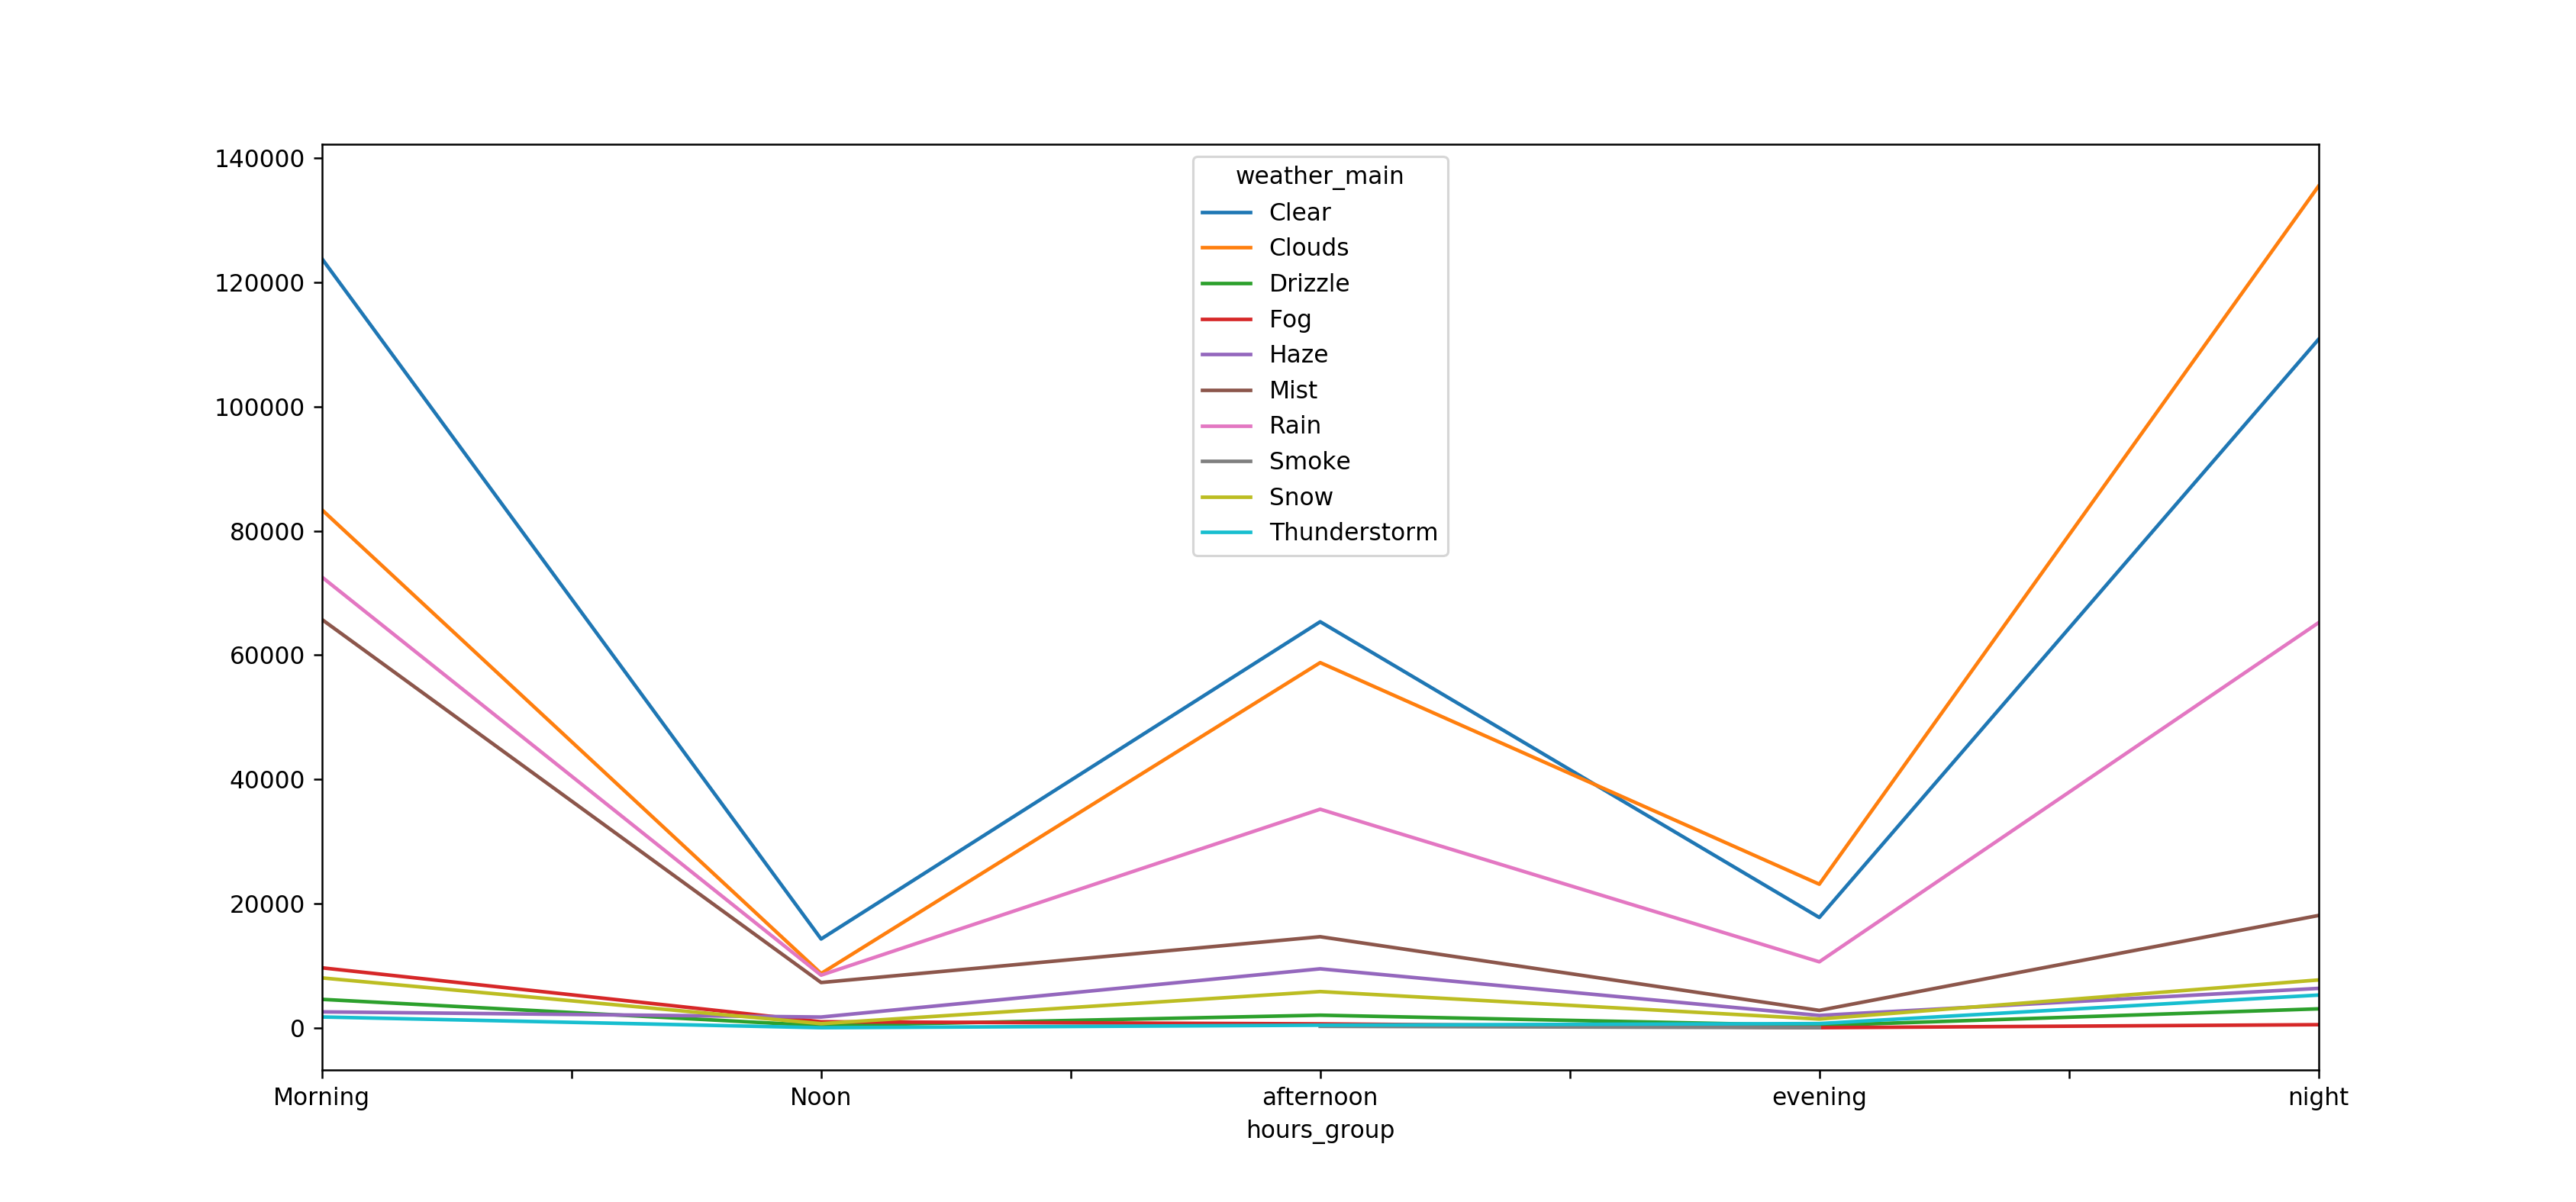

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
src_df.groupby(['hours_group','weather_main']).count()['Trip_Duration'].unstack().plot(ax=ax)

In [14]:
# Save an image of the chart and print it to the screen
plt.savefig("Stackedline_201801_weather_timeduration_hourgroups.png")
plt.show()

<IPython.core.display.Javascript object>


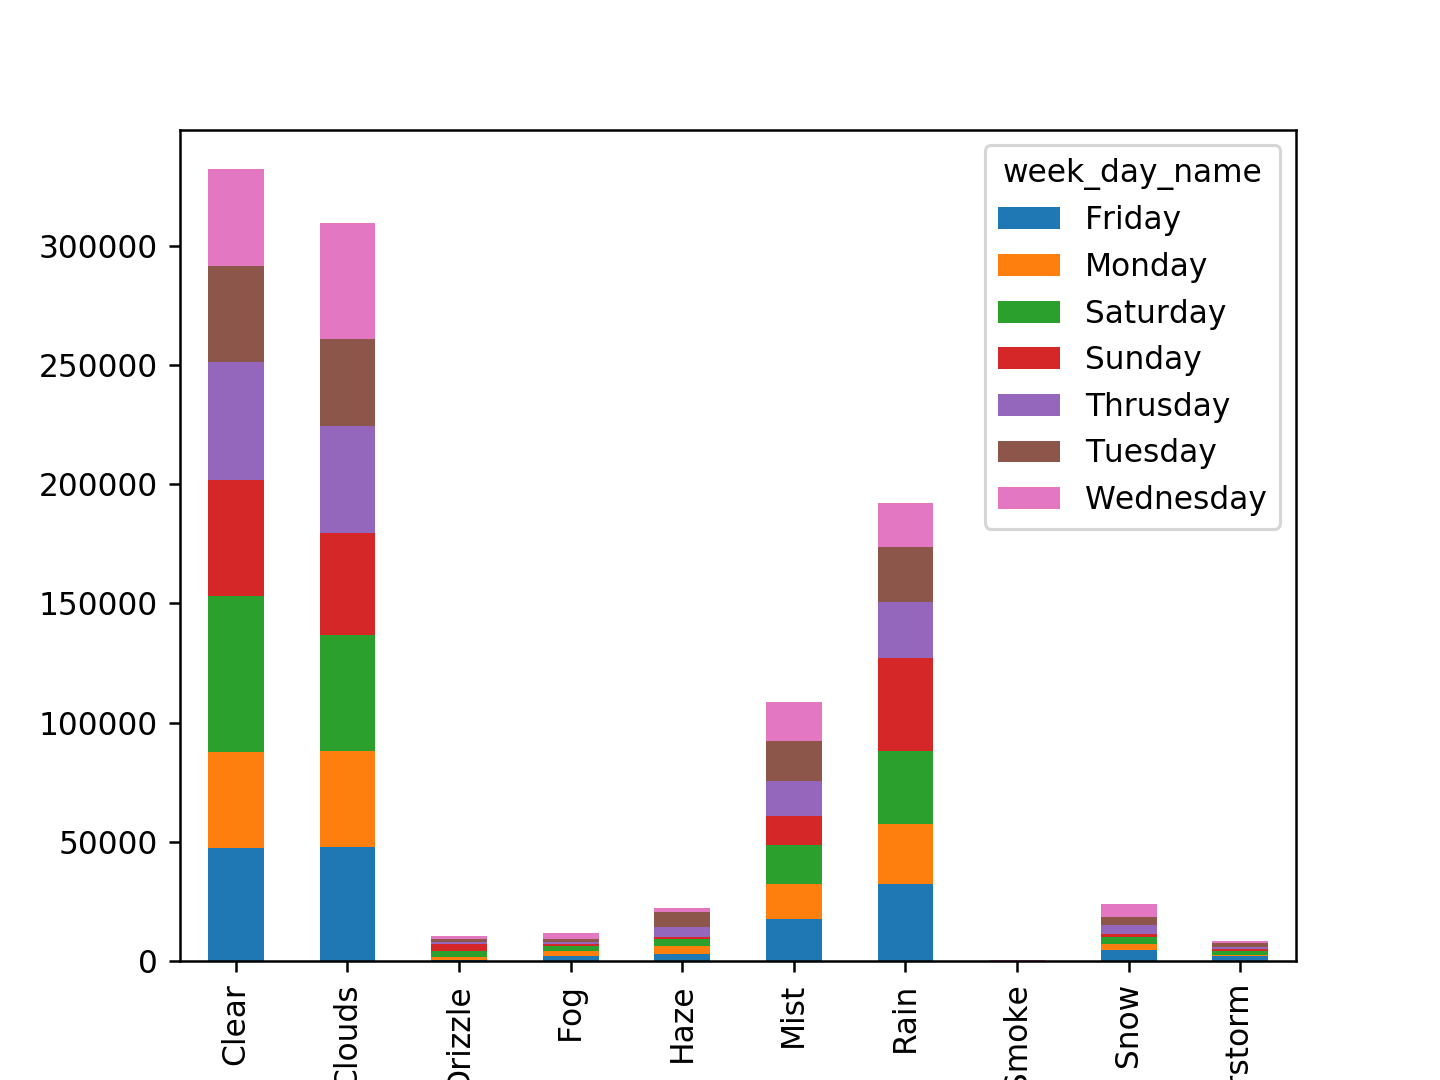

In [15]:
src_df.groupby(['weather_main','week_day_name']).size().unstack().plot(kind='bar',stacked=True)


In [16]:
# Save an image of the chart and print it to the screen
plt.savefig("StackedBar_201801_weather_hourly.png")
plt.show()

In [119]:
hours_df = src_df.groupby(['hours_group']).sum()['Trip_Duration']
hours_df = hours_df.reset_index()
#hours_df['hours_group'] = hours_df['hours_group'].astype(int)
#hours_df['Trip_Duration'] = hours_df['Trip_Duration'].astype(int)
hours_df

,hours_group,Trip_Duration
0,1,2247042.0
1,2,4951108.0
2,3,6597664.0
3,4,6621451.0


In [132]:
hours_df.iloc[:,1]
hours_df['hours_group'] = hours_df['hours_group'].astype(int)
hours_df.dtypes


hours_group        int32
Trip_Duration    float64
dtype: object

<IPython.core.display.Javascript object>


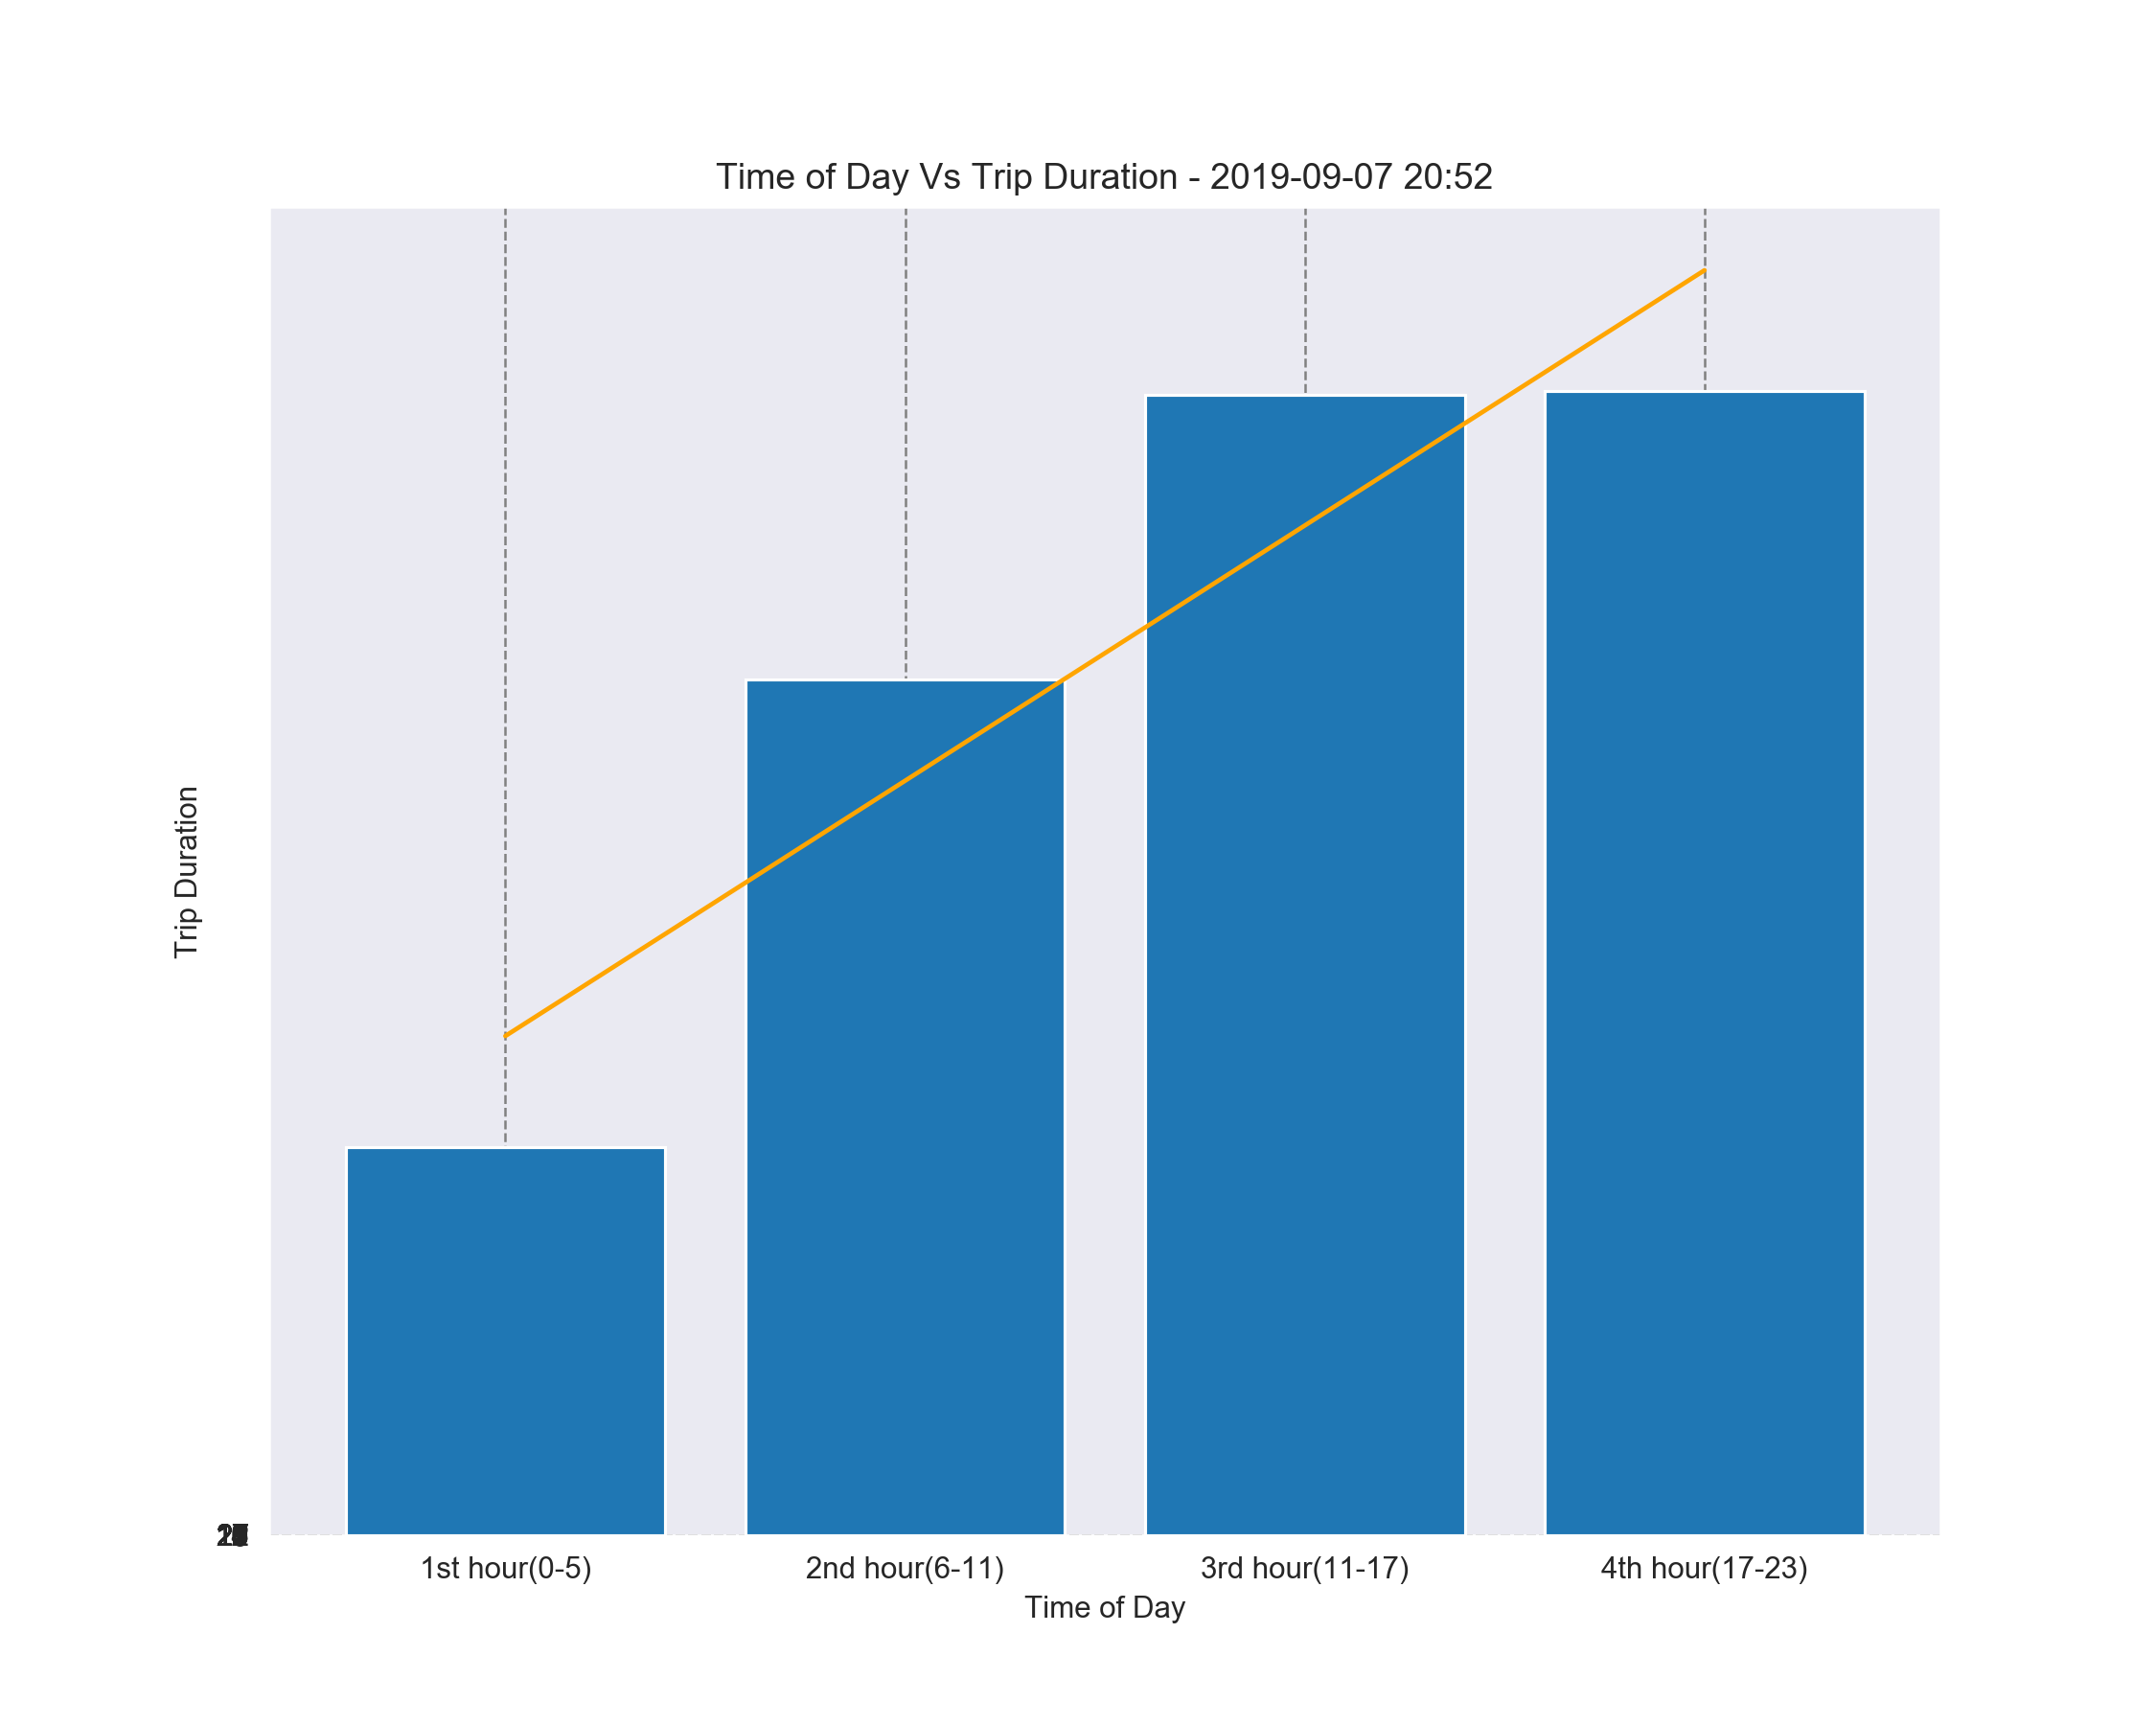

In [142]:
#Bar Chart with regression - Time of Day vs Trip Duration

now = datetime.datetime.now()
CurDate = now.strftime("%Y-%m-%d %H:%M")
lr = LinearRegression()
lr.fit(hours_df[['hours_group']], hours_df['Trip_Duration'])
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
  normalize=False, random_state=None, solver='auto', tol=0.001)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.yaxis.grid(color='grey', linestyle='dashed')
ax.xaxis.grid(color='grey', linestyle='dashed')
ax.set_xlabel("Time of Day")
ax.set_ylabel("Trip Duration")
ax.set_title("Time of Day Vs Trip Duration - " + CurDate)
ticklabels = ['1st hour(0-5)','2nd hour(6-11)','3rd hour(11-17)','4th hour(17-23)']
plt.yticks(np.arange(0, 26, step=1))
#plt.xticks(np.arange(0, 24, step=1))
ax.set_xticks(np.arange(1,5))
ax.set_xticklabels(ticklabels)

plt.bar(hours_df['hours_group'],hours_df['Trip_Duration'])

plt.plot(hours_df['hours_group'], lr.coef_*hours_df['hours_group']+lr.intercept_, color ='orange')

HvsTD = plt.gcf()
plt.show()

